#Imports
Fonte do dataset utilizado: https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction/data

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

In [53]:
dados = pd.read_csv("insurance.csv", sep=",")
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
dados.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Validar se temos campos com nulos 

In [55]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
#checando o que temos em region
dados["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [57]:
dados["sex"].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [58]:
dados["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Sem campos nulos
Vamos checar as correlações

PS: aqui teremos um erro

In [59]:
#analisando correlações
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

ValueError: could not convert string to float: 'female'

Precisamos preparar o nosso dataset transformando os campos alpha em numéricos.

Para este passo vamos usar o label_encoder

Mas vamos preservar o dataset original e trabalhar com uma cópia.

In [ ]:
#copiamos a base
dados_num = dados

In [ ]:


# colunas com dados string
colunas=['sex','smoker','region']

# usamos o label_enconder para transformar os padrões strings em padrões numéricos
label_encoder = LabelEncoder()
for col in colunas:
    dados_num[col] = label_encoder.fit_transform(dados_num[col])
dados_num.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Agora podemos reexecutar o correlation

<Axes: >

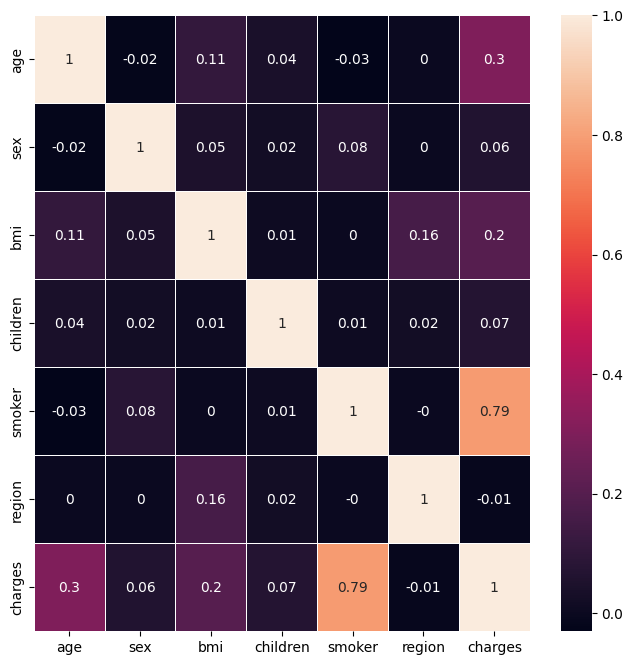

In [ ]:
#analisando correlações
correlation_matrix = dados_num.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Podemos ver uma forte relação entre fumantes (smoker) e valores (charges).

Idade também é relevante, mas fumar é ainda mais forte a relação ... 

E o IMC (bmi) que tem leve influencia nos valores (charges).

Ponto curioso a relação entre IMC X Região (bmi x region), talvez um fator cultural.

Vamos verificar visualmente estas informações

In [ ]:
import plotly_express as px
px.violin(dados, y="charges", x="smoker", color="smoker", box=True, points="all", hover_data=dados.columns)

Realmente o fator Fumante (smoker) influencia nos gastos (charges)

Vamos ver a relação com IMC (bmi)

In [ ]:
import plotly_express as px
px.violin(dados, y="charges", x="bmi", color="bmi", box=True, points="all", hover_data=dados.columns)

Pela pluraridade dos valores de IMC (bmi) vamos tentar de outra visualização

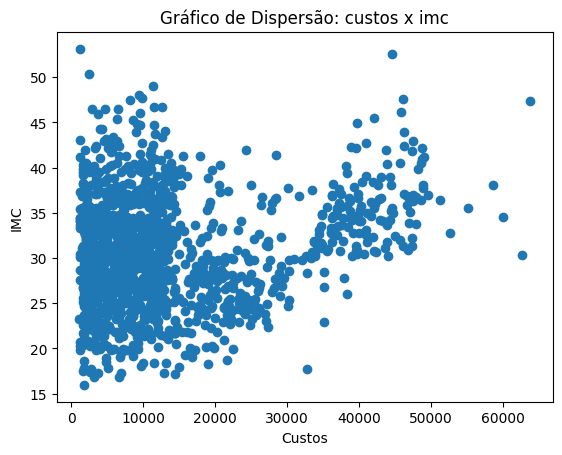

In [ ]:
plt.scatter(dados['charges'],dados['bmi'])
plt.xlabel('Custos')
plt.ylabel('IMC')
plt.title('Gráfico de Dispersão: custos x imc')
plt.show()

Percebemos que a partir de IMC (bmi) maior que 30 os custos podem disparar ... 

Mas temos alguns outliers ... 

<Axes: xlabel='bmi'>

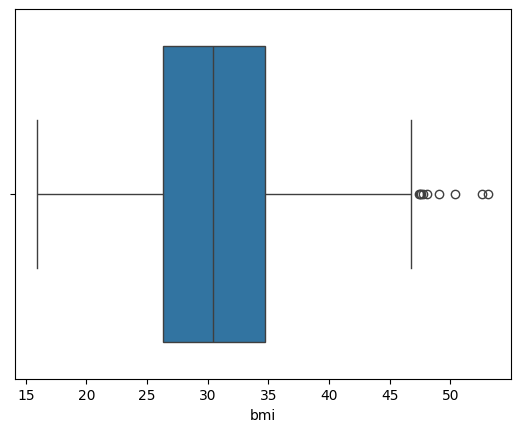

In [ ]:
sns.boxplot(x=dados['bmi'])

vamos ver se temos outliers em custos (charges)

<Axes: xlabel='charges'>

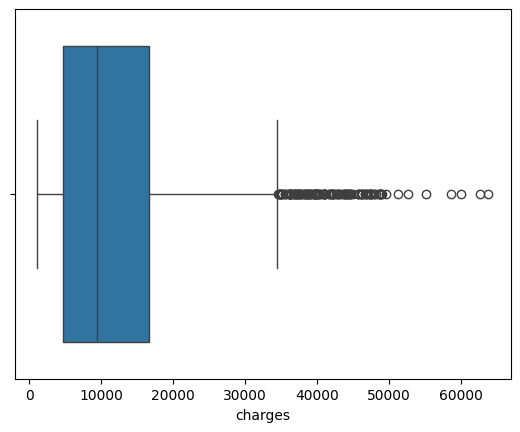

In [ ]:
sns.boxplot(x=dados['charges'])

In [ ]:
import plotly_express as px
px.violin(dados, y="charges", x="sex", color="sex", box=True, points="all", hover_data=dados.columns)

Vamos agora preparar as nossas predições.

Vamos usar o dataset numérico.


In [61]:
x = dados_num[['age','sex','bmi','children', 'smoker','region']] #variaveis independentes
y = dados_num['charges'] #target
#Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7) #70% treino e 30% teste
